In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
frames_array = np.load('frames_array_128.npy')

In [3]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(8 * 8 * 1024, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((8, 8, 1024)))
    assert model.output_shape == (None, 8, 8, 1024)

    model.add(layers.Conv2DTranspose(512, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 16, 16, 512)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 32, 32, 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 64, 64, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 128, 128, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 128, 128, 3)

    return model


In [4]:
def discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', input_shape=[128, 128, 3]))
    model.add(layers.LeakyReLU())
   
    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model


Epoch 0, D Loss: 0.13480059802532196, G Loss: 0.5177170038223267


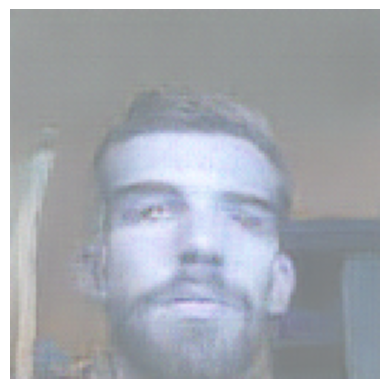

INFO:tensorflow:Assets written to: generator_128_e0_model\assets


INFO:tensorflow:Assets written to: generator_128_e0_model\assets


INFO:tensorflow:Assets written to: discriminator_e0_model\assets


INFO:tensorflow:Assets written to: discriminator_e0_model\assets


Epoch 100, D Loss: 0.1835029125213623, G Loss: 3.189215660095215


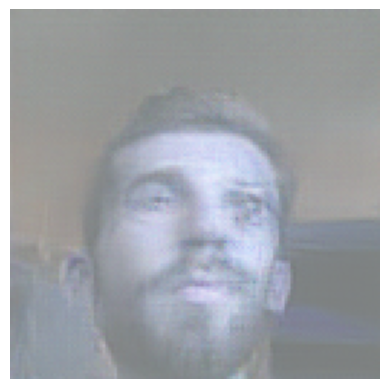

Epoch 200, D Loss: 2.568189859390259, G Loss: 0.8823662996292114


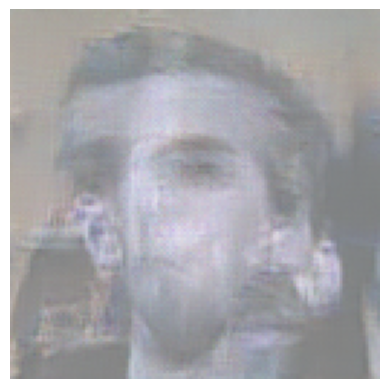

Epoch 300, D Loss: 0.45428118109703064, G Loss: 2.631592273712158


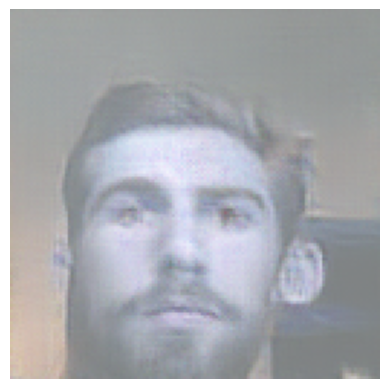

Epoch 400, D Loss: 0.23186148703098297, G Loss: 3.730504035949707


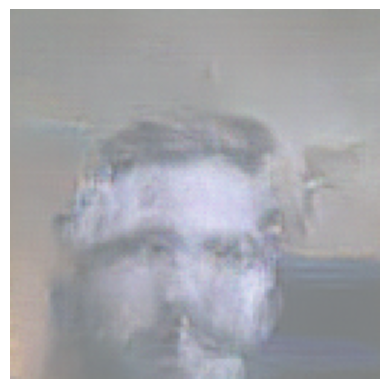

Epoch 500, D Loss: 0.16175688803195953, G Loss: 3.6351161003112793


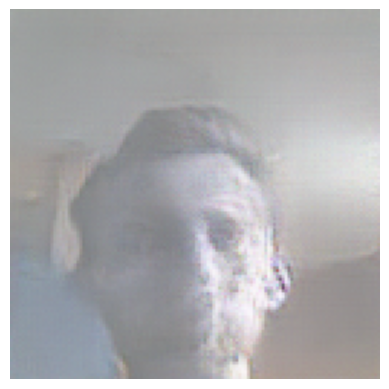

INFO:tensorflow:Assets written to: generator_128_e500_model\assets


INFO:tensorflow:Assets written to: generator_128_e500_model\assets


INFO:tensorflow:Assets written to: discriminator_e500_model\assets


INFO:tensorflow:Assets written to: discriminator_e500_model\assets


Epoch 600, D Loss: 2.0453028678894043, G Loss: 3.5309128761291504


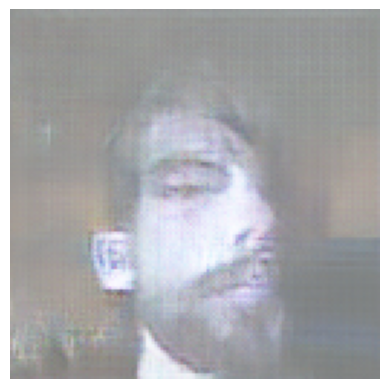

Epoch 700, D Loss: 0.19897246360778809, G Loss: 4.052206993103027


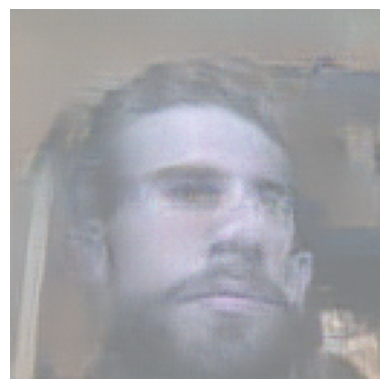

Epoch 800, D Loss: 0.1774846613407135, G Loss: 5.336679935455322


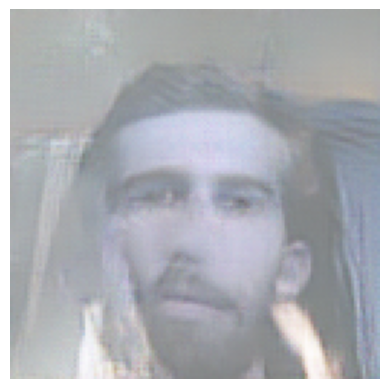

Epoch 900, D Loss: 0.7086778879165649, G Loss: 7.370415210723877


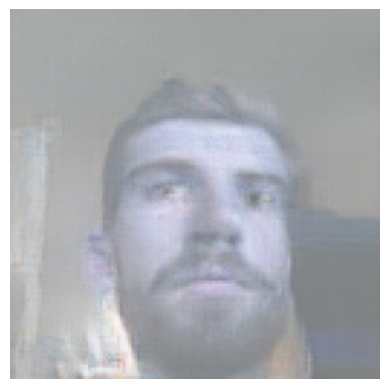

Epoch 1000, D Loss: 0.16769184172153473, G Loss: 5.327049255371094


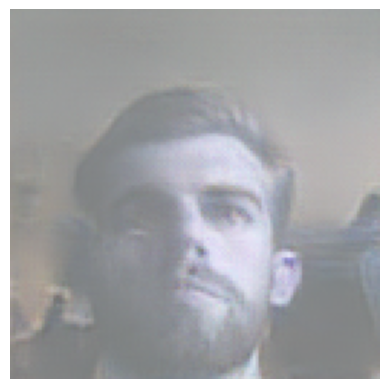

INFO:tensorflow:Assets written to: generator_128_e1000_model\assets


INFO:tensorflow:Assets written to: generator_128_e1000_model\assets


INFO:tensorflow:Assets written to: discriminator_e1000_model\assets


INFO:tensorflow:Assets written to: discriminator_e1000_model\assets


Epoch 1100, D Loss: 0.2135806679725647, G Loss: 4.584360122680664


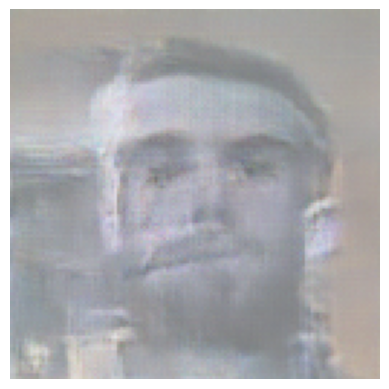

Epoch 1200, D Loss: 0.4311484098434448, G Loss: 5.7230658531188965


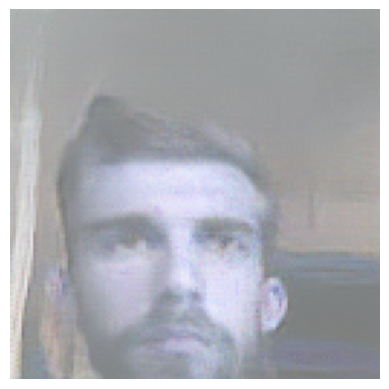

Epoch 1300, D Loss: 0.8623239398002625, G Loss: 3.727142095565796


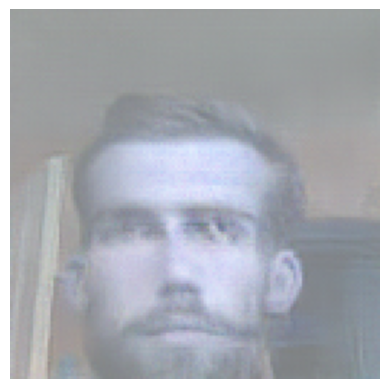

Epoch 1400, D Loss: 0.15257671475410461, G Loss: 5.036860466003418


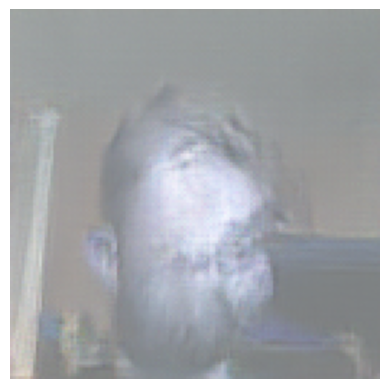

Epoch 1500, D Loss: 0.18677964806556702, G Loss: 3.7519493103027344


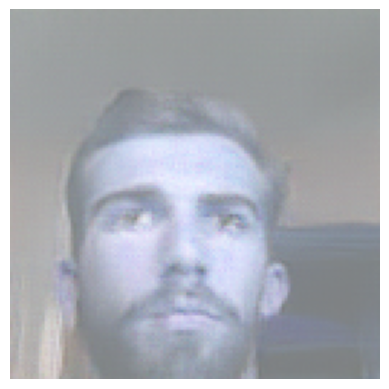

INFO:tensorflow:Assets written to: generator_128_e1500_model\assets


INFO:tensorflow:Assets written to: generator_128_e1500_model\assets


INFO:tensorflow:Assets written to: discriminator_e1500_model\assets


INFO:tensorflow:Assets written to: discriminator_e1500_model\assets


Epoch 1600, D Loss: 0.05952785164117813, G Loss: 6.01646614074707


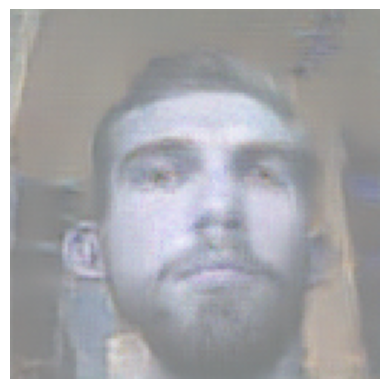

Epoch 1700, D Loss: 0.15046638250350952, G Loss: 3.050158977508545


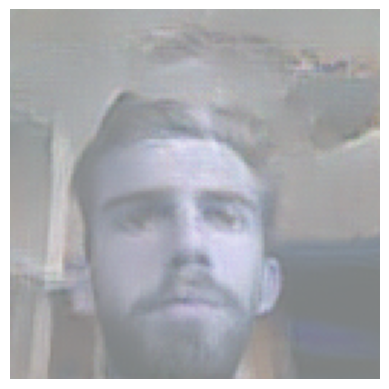

Epoch 1800, D Loss: 0.2589750289916992, G Loss: 7.368307113647461


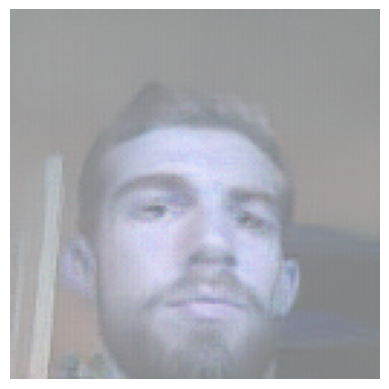

Epoch 1900, D Loss: 1.79193913936615, G Loss: 11.52708625793457


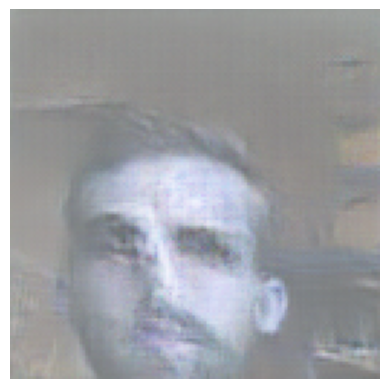

Epoch 2000, D Loss: 0.1416463702917099, G Loss: 3.7048773765563965


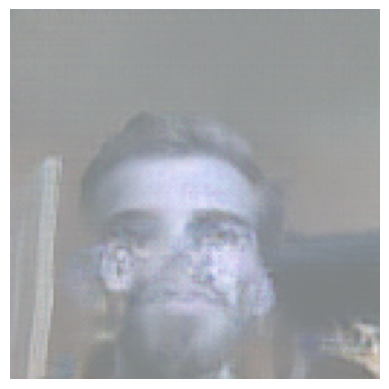

INFO:tensorflow:Assets written to: generator_128_e2000_model\assets


INFO:tensorflow:Assets written to: generator_128_e2000_model\assets


INFO:tensorflow:Assets written to: discriminator_e2000_model\assets


INFO:tensorflow:Assets written to: discriminator_e2000_model\assets


Epoch 2100, D Loss: 0.6270028948783875, G Loss: 3.650942087173462


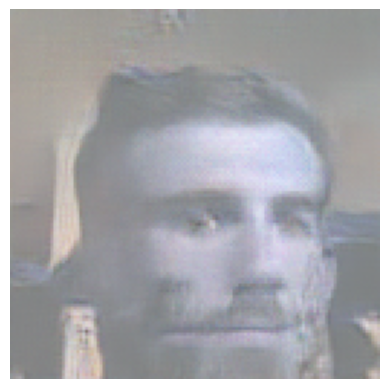

Epoch 2200, D Loss: 0.33462798595428467, G Loss: 4.462824821472168


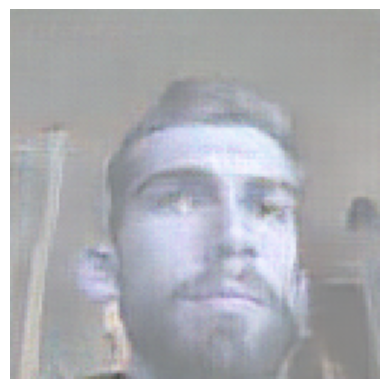

Epoch 2300, D Loss: 0.0727301687002182, G Loss: 4.4134416580200195


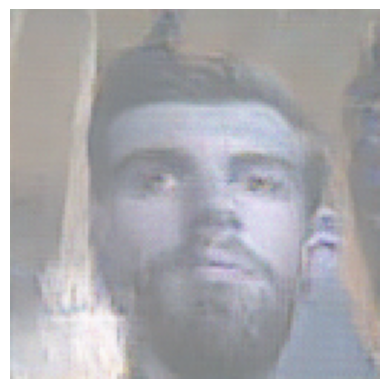

Epoch 2400, D Loss: 0.42636653780937195, G Loss: 3.141111135482788


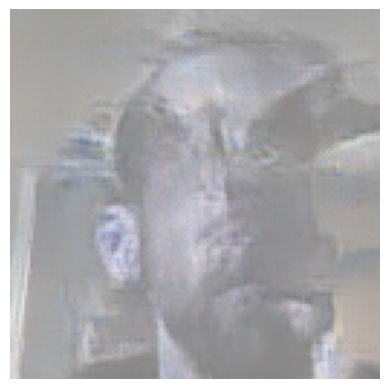

Epoch 2500, D Loss: 0.1157616376876831, G Loss: 4.675401210784912


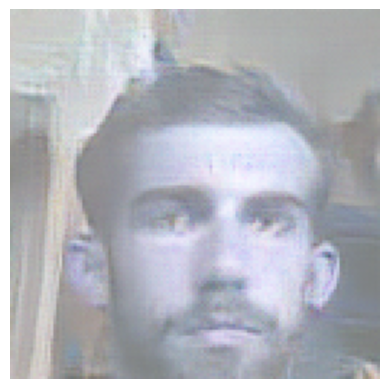

INFO:tensorflow:Assets written to: generator_128_e2500_model\assets


INFO:tensorflow:Assets written to: generator_128_e2500_model\assets


INFO:tensorflow:Assets written to: discriminator_e2500_model\assets


INFO:tensorflow:Assets written to: discriminator_e2500_model\assets


Epoch 2600, D Loss: 0.1503005027770996, G Loss: 4.082484722137451


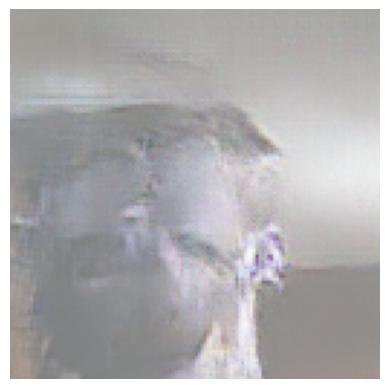

Epoch 2700, D Loss: 0.30938270688056946, G Loss: 4.6663970947265625


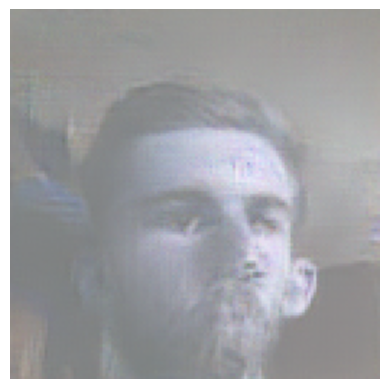

Epoch 2800, D Loss: 0.45067906379699707, G Loss: 4.8509321212768555


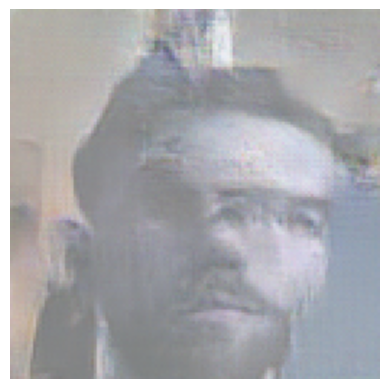

Epoch 2900, D Loss: 0.11980092525482178, G Loss: 5.918444633483887


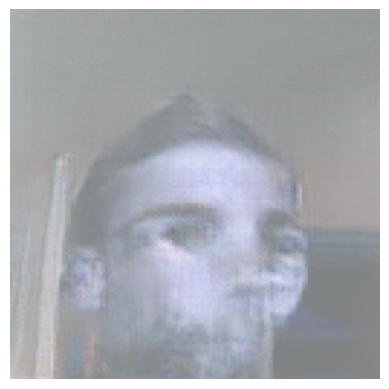

Epoch 3000, D Loss: 0.052107758820056915, G Loss: 5.17234468460083


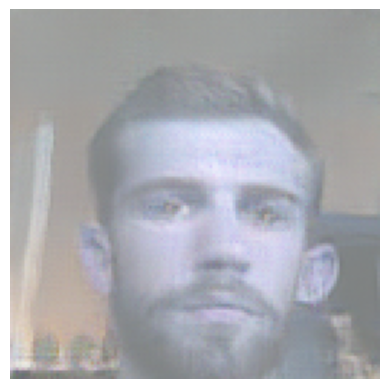

INFO:tensorflow:Assets written to: generator_128_e3000_model\assets


INFO:tensorflow:Assets written to: generator_128_e3000_model\assets


INFO:tensorflow:Assets written to: discriminator_e3000_model\assets


INFO:tensorflow:Assets written to: discriminator_e3000_model\assets


Epoch 3100, D Loss: 0.065421462059021, G Loss: 4.743880271911621


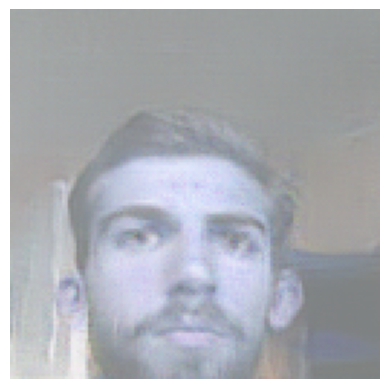

Epoch 3200, D Loss: 1.6785796880722046, G Loss: 9.215510368347168


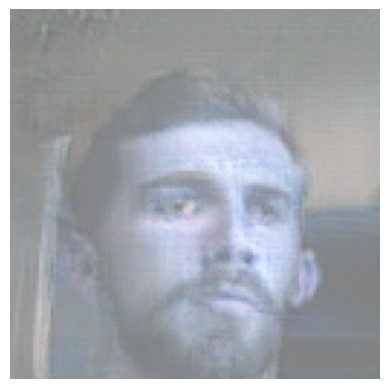

Epoch 3300, D Loss: 0.32320359349250793, G Loss: 6.587012767791748


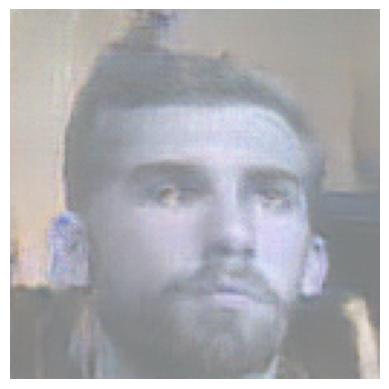

Epoch 3400, D Loss: 0.45079606771469116, G Loss: 4.2536540031433105


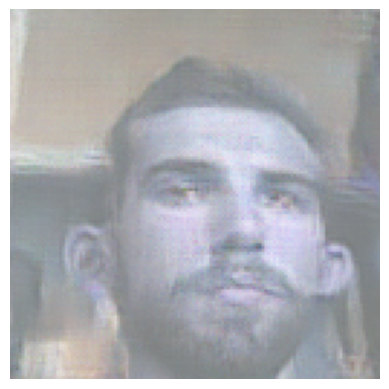

Epoch 3500, D Loss: 0.0772915631532669, G Loss: 4.02932071685791


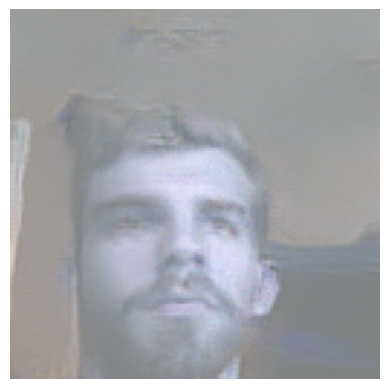

INFO:tensorflow:Assets written to: generator_128_e3500_model\assets


INFO:tensorflow:Assets written to: generator_128_e3500_model\assets


INFO:tensorflow:Assets written to: discriminator_e3500_model\assets


INFO:tensorflow:Assets written to: discriminator_e3500_model\assets


KeyboardInterrupt: 

In [78]:
# Define hyperparameters
latent_dim = 100
input_shape = (128, 128, 3)
batch_size = 16
epochs = 10000
noize = np.random.randn(1, latent_dim)

# Build generator and discriminator
#generator = generator_model()
#discriminator = discriminator_model()

# Define optimizers and loss function
generator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
loss_function = BinaryCrossentropy()

# Training loop
for epoch in range(epochs):
    # Train discriminator
    for _ in range(1):
        real_images = frames_array[np.random.randint(0, frames_array.shape[0], batch_size)]
        fake_images = generator(np.random.randn(batch_size, latent_dim))
        
        real_labels = np.ones((batch_size, 1))
        fake_labels = np.zeros((batch_size, 1))

        with tf.GradientTape() as disc_tape:
            real_loss = loss_function(real_labels, discriminator(real_images))
            fake_loss = loss_function(fake_labels, discriminator(fake_images))
            total_discriminator_loss = real_loss + fake_loss

        gradients_of_discriminator = disc_tape.gradient(total_discriminator_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Train generator
    with tf.GradientTape() as gen_tape:
        generated_images = generator(np.random.randn(batch_size, latent_dim))
        generator_loss = loss_function(np.ones((batch_size, 1)), discriminator(generated_images))

    gradients_of_generator = gen_tape.gradient(generator_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {total_discriminator_loss.numpy()}, G Loss: {generator_loss.numpy()}")
        new_generated_images = generator(np.random.randn(1, latent_dim))
        # Normalize generated images to [0, 1] range
        normalized_generated_images = (0.5 * new_generated_images + 0.5)

        # Display the normalized generated image
        plt.imshow(normalized_generated_images[0])
        plt.axis('off')  # Turn off axis labels and ticks
        plt.show()
        
    if epoch % 500 == 0:        
        # Save generator model
        generator.save('generator_128_e'+str(epoch)+'_model')

        # Save discriminator model
        discriminator.save('discriminator_e'+str(epoch)+'_model')

# After training, you can use the generator to create new images
new_generated_images = generator(np.random.randn(number_of_images, latent_dim))


In [46]:
# Load the generator model
generator = tf.keras.models.load_model('generator_128_e8500_model')

# Load the discriminator model
discriminator = tf.keras.models.load_model('discriminator_e8500_model')

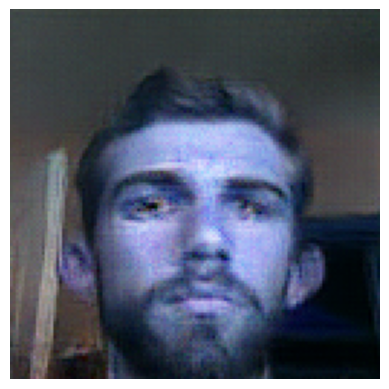

In [93]:
new_generated_images = generator(np.random.randn(1, 100))
# Normalize generated images to [0, 1] range
normalized_generated_images = 0.5 * new_generated_images + 0.5

# Display the normalized generated image
plt.imshow(new_generated_images[0])
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

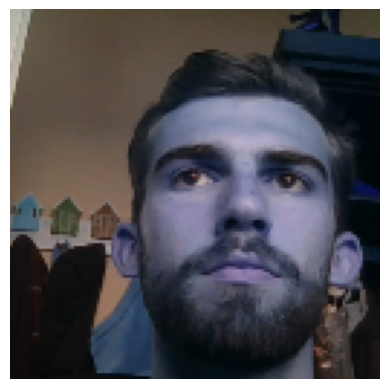

In [66]:
plt.imshow(frames_array[1])
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [ ]:
# Save generator model
generator.save('generator_128_model')

# Save discriminator model
discriminator.save('discriminator_128_model')